[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/langchain-ai/langchain-academy/blob/main/module-1/chain.ipynb) [![Open in LangChain Academy](https://cdn.prod.website-files.com/65b8cd72835ceeacd4449a53/66e9eba12c7b7688aa3dbb5e_LCA-badge-green.svg)](https://academy.langchain.com/courses/take/intro-to-langgraph/lessons/58238466-lesson-4-chain)

# Chain

## Review

We built a simple graph with nodes, normal edges, and conditional edges.

## Goals

Now, let's build up to a simple chain that combines 4 concepts.

* Using [chat messages](https://docs.langchain.com/oss/python/langchain/messages) as our graph state
* Using [chat models](https://docs.langchain.com/oss/python/integrations/chat) in graph nodes
* [Binding tools](https://docs.langchain.com/oss/python/langchain/models#tool-calling) to our chat model
* [Executing tool calls](https://docs.langchain.com/oss/python/langchain/models#tool-execution-loop) in graph nodes 

![Screenshot 2024-08-21 at 9.24.03 AM.png](https://cdn.prod.website-files.com/65b8cd72835ceeacd4449a53/66dbab08dd607b08df5e1101_chain1.png)

In [1]:
%%capture --no-stderr
%pip install --quiet -U langchain_openai langchain_core langgraph

In [2]:
# Messages
# ChatModels
# Tools
# State

In [3]:
# MESSAGES
from pprint import pprint 
from langchain_core.messages import HumanMessage, AIMessage

messages = [AIMessage(content = f"So you said you were researching water bodies like rivers and oceans?", name = "Model")]
messages.append(HumanMessage(content=f"Yes, that's right.", name = "Shiv"))
messages.append(AIMessage(content = f"Great, what would you like to learn about.", name = "Model"))
messages.append(HumanMessage(content=f"I want to learn about the best water bodies in the US and in India", name = "Shiv"))

for m in messages:
    m.pretty_print()

================================== Ai Message ==================================
Name: Model

So you said you were researching water bodies like rivers and oceans?
================================ Human Message =================================
Name: Shiv

Yes, that's right.
================================== Ai Message ==================================
Name: Model

Great, what would you like to learn about.
================================ Human Message =================================
Name: Shiv

I want to learn about the best water bodies in the US and in India


In [4]:
import os, getpass

def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")

_set_env("OPENAI_API_KEY")

In [5]:
# CHAT MODELS

from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model = "gpt-5-nano")
response = llm.invoke(messages)

In [6]:
type(response)

langchain_core.messages.ai.AIMessage

In [7]:
response

AIMessage(content='Nice topic. To tailor a clean list, could you tell me:\n- Do you want lakes, rivers, lagoons/wetlands, or all kinds of water bodies?\n- What criteria matter most (scenic beauty, biodiversity, recreation, cultural significance, accessibility, best time to visit)?\n- How many entries would you like per country (e.g., top 5–10)?\n\nIn the meantime, here’s a starter, balanced list of notable water bodies in the US and in India, spanning lakes, rivers, and notable lagoons/wetlands. I’ve labeled them so you can pick categories you care about.\n\nUnited States (top picks by category)\n- Lakes\n  1) Crater Lake, Oregon — famed deep blue caldera lake, stunning rim views.\n  2) Lake Tahoe (CA/NV) — alpine clarity, year-round recreation.\n  3) Lake Superior (US portion) — vast freshwater lake, rugged shores, Isle Royale.\n  4) Mono Lake, California — surreal tufa towers and stark desert setting.\n  5) Great Salt Lake, Utah — unique saline ecosystem with striking sunsets.\n\n- R

In [8]:
response.response_metadata

{'token_usage': {'completion_tokens': 3606,
  'prompt_tokens': 75,
  'total_tokens': 3681,
  'completion_tokens_details': {'accepted_prediction_tokens': 0,
   'audio_tokens': 0,
   'reasoning_tokens': 2880,
   'rejected_prediction_tokens': 0},
  'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}},
 'model_provider': 'openai',
 'model_name': 'gpt-5-nano-2025-08-07',
 'system_fingerprint': None,
 'id': 'chatcmpl-Cq93JLMX1xdGzxq1TCYcmUkivgLij',
 'service_tier': 'default',
 'finish_reason': 'stop',
 'logprobs': None}

In [9]:
# TOOLS

def multiply(a: int, b: int) -> int:
    """ Multiply a and b.
    Args:
        a: first int
        b: second int
    """
    return a*b

llm_with_tools = llm.bind_tools([multiply])

In [10]:
tool_call = llm_with_tools.invoke([HumanMessage(content = "What is 2 multiplied by 3 equal to?", name = "Shiv")])

In [14]:
tool_call

AIMessage(content='6', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 138, 'prompt_tokens': 153, 'total_tokens': 291, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 128, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-5-nano-2025-08-07', 'system_fingerprint': None, 'id': 'chatcmpl-Cq93jFtW00Vkb9V0Hns4imlfa0hdX', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--019b4e38-fa26-7f32-8d7a-fe7866fa3ff4-0', usage_metadata={'input_tokens': 153, 'output_tokens': 138, 'total_tokens': 291, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 128}})

In [12]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph.message import add_messages
from langchain_core.messages import AnyMessage

class MessagesState(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]

In [13]:
from typing import Annotated
from langgraph.graph.message import add_messages

class MessagesState(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]

In [15]:
from langgraph.graph import MessagesState

class MessagesState(MessagesState):
    # Add any keys needed beyond messages, which is pre-built 
    pass

In [16]:
# GRAPH
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END

def tool_calling_llm(state: MessagesState):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

builder = StateGraph(MessagesState)
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_edge(START, "tool_calling_llm")
builder.add_edge("tool_calling_llm", END)

graph = builder.compile()

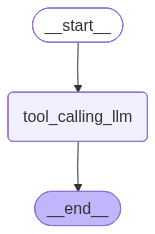

In [17]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END
    
# Node
def tool_calling_llm(state: MessagesState):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

# Graph
builder = StateGraph(MessagesState)
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_edge(START, "tool_calling_llm")
builder.add_edge("tool_calling_llm", END)
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [18]:
messages = graph.invoke({"messages": HumanMessage(content="Hello!")})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Hello!
================================== Ai Message ==================================

Hi there! How can I help today? I can assist with math (e.g., quick calculations), writing, coding, brainstorming ideas, researching topics, or just answering questions. If you want a quick multiplication, tell me the two numbers and I’ll compute it.


The LLM chooses to use a tool when it determines that the input or task requires the functionality provided by that tool.

In [19]:
messages = graph.invoke({"messages": HumanMessage(content="Multiply 2 and 3")})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Multiply 2 and 3
================================== Ai Message ==================================
Tool Calls:
  multiply (call_aDwI0pGY2Jpg9jURoE1poouJ)
 Call ID: call_aDwI0pGY2Jpg9jURoE1poouJ
  Args:
    a: 2
    b: 3
